# Instructions 

Combine everything we have learned in class to clean and perform EDA on this dataset. Follow the steps in the class notes our past classes. You may follow the steps from February 19th class after you perform the data cleaning. 

# Remember, if you have questions, please set up the one on one doubt session


You can find the data at this url: https://raw.githubusercontent.com/JD-DataScienceProjects/Careerera_Projects/main/Anxiety_3.csv


1. Perform the initial importing of libraries 
2. Perform the check of size, columns names and datatypes etc.
3. Perform the cleaning steps 
4. Perform the EDA using visualization 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/JD-DataScienceProjects/Careerera_Projects/main/Anxiety_3.csv")

In [3]:
# Before doing anu EDA we need to first clean the data.
# That entails understanding the data. 
# In order to get the general overview of the data the following is done.

df.head()
# To check if the data is imported properly

,Instructor,Anxiety Scores,Final Scores,Gender
0,C,62.0,16.0,Female
1,D,60.0,43.0,Male
2,A,31.0,24.0,Male
3,C,32.0,16.0,Male
4,C,66.0,12.0,Female


In [4]:
df.shape
# to see the number of rows and columns


(500, 4)

In [5]:
df.info()

# To get a general overview of the data available

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Instructor      500 non-null    object 
 1   Anxiety Scores  452 non-null    float64
 2   Final Scores    454 non-null    float64
 3   Gender          500 non-null    object 
dtypes: float64(2), object(2)
memory usage: 15.8+ KB


In [6]:
df.describe()

# To understand the various parameters of the continuous variables

,Anxiety Scores,Final Scores
count,452.000000,454.000000
mean,34.767699,34.427313
std,20.290496,19.934501
min,0.000000,0.000000
25%,17.000000,18.000000
50%,34.000000,35.000000
75%,53.000000,51.000000
max,69.000000,69.000000


In [7]:
df.columns

# to get teh column names

Index(['Instructor', 'Anxiety Scores', 'Final Scores', 'Gender'], dtype='object')

In [8]:
df.dtypes 

# to get the data types

Instructor         object
Anxiety Scores    float64
Final Scores      float64
Gender             object
dtype: object

In [9]:
df['Instructor'].value_counts()

D    148
C    122
A    122
B    108
Name: Instructor, dtype: int64

<AxesSubplot:xlabel='Instructor', ylabel='count'>

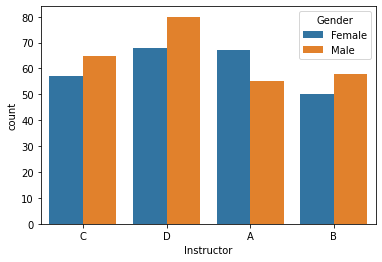

In [10]:
sns.countplot(data = df,x='Instructor', hue = 'Gender')

# From the data its clear that the number of students that A, B, C & D is not the same

In [11]:
freq_table = pd.crosstab(df['Gender'], df['Instructor'])
freq_table 

# This helps us understand the number of students for A, B, C & D

Instructor,A,B,C,D
Gender,,,,
Female,67,50,57,68
Male,55,58,65,80


In [12]:
df[df.duplicated()]

# This helps us to find the duplicates in the dataframe

,Instructor,Anxiety Scores,Final Scores,Gender
84,C,57.0,9.0,Male
106,B,68.0,NaN,Male
221,C,NaN,50.0,Male
432,A,NaN,28.0,Female
478,A,NaN,54.0,Female


In [13]:
df.drop_duplicates(inplace = True)

# Helps to remove the duplicates in the dataframe.
# Inplace = True helps to make sure that the changes ie deleted rows are permanenetly removed.

In [14]:
df.reset_index(drop=True, inplace =True)

# helps to reset the index aftre the rows are dropped. If this is not done, the rows which were deleted
# those numbers will remain missing.


In [15]:
df

# This is just to cross check that row numbers are reset

,Instructor,Anxiety Scores,Final Scores,Gender
0,C,62.0,16.0,Female
1,D,60.0,43.0,Male
2,A,31.0,24.0,Male
3,C,32.0,16.0,Male
4,C,66.0,12.0,Female
...,...,...,...,...
490,C,63.0,25.0,Male
491,C,27.0,25.0,Female
492,D,NaN,46.0,Male
493,A,38.0,31.0,Male


In [16]:
df.isnull().sum()

Instructor         0
Anxiety Scores    45
Final Scores      45
Gender             0
dtype: int64

<AxesSubplot:>

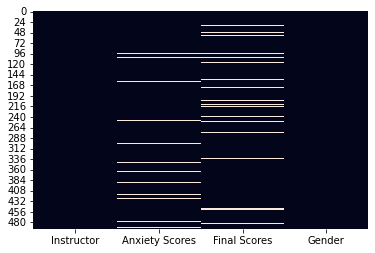

In [229]:
ax = sns.heatmap(df.isnull(), cbar = False)

In [230]:
df.skew()

/var/folders/dt/g8hh_3f928b9xdkmf_t2fw_80000gn/T/ipykernel_86991/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Anxiety Scores   -0.021733
Final Scores     -0.006176
dtype: float64

In [231]:
df['Anxiety Scores'].skew()

-0.02173345126488385

In [232]:
df['Final Scores'].skew()

-0.00617608167063684

In [233]:
# From the skew it is clear that 'Anxiety' and 'Final' have next to nothing skewness
# So it will be prudent to replace the data with median values
# We are using median as the mean value can be a float but most value of dataframe
# seem to be integers (they are float but with decimals as zero)

df['Anxiety Scores'] = df['Anxiety Scores'].fillna(df['Anxiety Scores'].median())
df['Final Scores']= df['Final Scores'].fillna(df['Final Scores'].median())

In [128]:
df.isnull().sum()

# this is just to cross check if the values are filled and null values are not there.


Instructor        0
Anxiety Scores    0
Final Scores      0
Gender            0
dtype: int64

<AxesSubplot:xlabel='Anxiety Scores'>

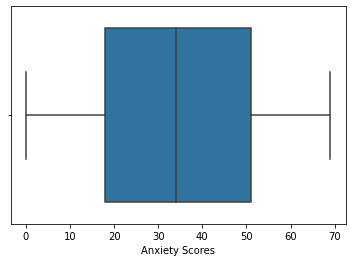

In [129]:
# Now we shall try and look at the anolamies or outliers if any. 
# Best way to achieve the same is the box plot

bx = sns.boxplot(data = df , x = 'Anxiety Scores')

# its clear that there are not outliers in Anxiety Scores and very low skewness

<AxesSubplot:xlabel='Final Scores'>

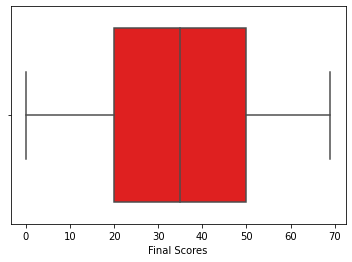

In [130]:
cx = sns.boxplot(data = df , x = 'Final Scores',color = 'red')

# its clear that ther are not outliers in Final Scores and very low skewness

In [131]:
# Now we shall try and find out who has scored the max marks

df[df['Final Scores'] == df['Final Scores'].max()]

# As we can see her lots of people have scores maximum marks.

,Instructor,Anxiety Scores,Final Scores,Gender
24,D,41.0,69.0,Female
29,D,12.0,69.0,Female
30,A,59.0,69.0,Male
62,A,59.0,69.0,Female
150,A,34.0,69.0,Male
265,C,55.0,69.0,Male
394,B,50.0,69.0,Male
483,A,55.0,69.0,Female


In [132]:
# We shall now try and sort the max scores based on Anxiety Scores

df[df['Final Scores'] == df['Final Scores'].max()].sort_values(by='Anxiety Scores')

,Instructor,Anxiety Scores,Final Scores,Gender
29,D,12.0,69.0,Female
150,A,34.0,69.0,Male
24,D,41.0,69.0,Female
394,B,50.0,69.0,Male
265,C,55.0,69.0,Male
483,A,55.0,69.0,Female
30,A,59.0,69.0,Male
62,A,59.0,69.0,Female


In [133]:
# As we can see in the above dataframe that D has helped achieve the max score
# with the least anxiety

In [134]:
# We shall now try and sort the max scores based on Gender

df[df['Final Scores'] == df['Final Scores'].max()].sort_values(by='Gender')

,Instructor,Anxiety Scores,Final Scores,Gender
24,D,41.0,69.0,Female
29,D,12.0,69.0,Female
62,A,59.0,69.0,Female
483,A,55.0,69.0,Female
30,A,59.0,69.0,Male
150,A,34.0,69.0,Male
265,C,55.0,69.0,Male
394,B,50.0,69.0,Male


In [135]:
# it shows that 4 males and 4 females have scores the maximum marks

In [136]:
# We shall now try and sort the max scores based on Instructor

df[df['Final Scores'] == df['Final Scores'].max()].sort_values(by='Instructor')

,Instructor,Anxiety Scores,Final Scores,Gender
30,A,59.0,69.0,Male
62,A,59.0,69.0,Female
150,A,34.0,69.0,Male
483,A,55.0,69.0,Female
394,B,50.0,69.0,Male
265,C,55.0,69.0,Male
24,D,41.0,69.0,Female
29,D,12.0,69.0,Female


In [137]:
# We can see that A has the maximum number of students with maximum parts

Text(0.5, 1.0, 'Countplot for Instructors differentiated by Gender')

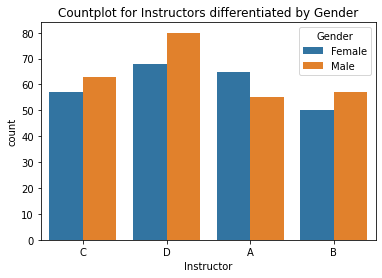

In [235]:
# Now we shall see that after clearing the data how many students are left for A, B,C & D

dx = sns.countplot(data = df, x = 'Instructor', hue = 'Gender')
dx.set_title("Countplot for Instructors differentiated by Gender")

In [139]:
freq_table = pd.crosstab(df['Instructor'],df['Gender'])


In [140]:
freq_table['Total'] = freq_table.sum(axis=1)

In [141]:
freq_table

Gender,Female,Male,Total
Instructor,,,
A,65,55,120
B,50,57,107
C,57,63,120
D,68,80,148


In [142]:
# The chart gives us the eaxct values but for the purpose of eaxmination
# the table shall suffice

/Users/kushal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


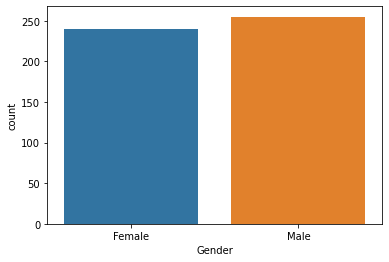

In [236]:
# lets try and examine how many total number of males and female are there

ex = sns.countplot(df['Gender'])

# The graphs makes it clear that the males are more with respect to females but only slighly

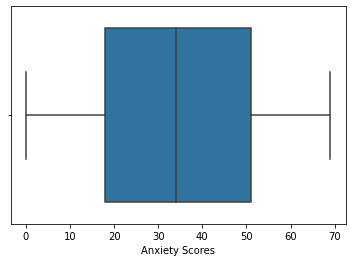

In [158]:
# Now lets loo at the overall spread of the data using boxplots

spread1 = sns.boxplot(x = df['Anxiety Scores'])

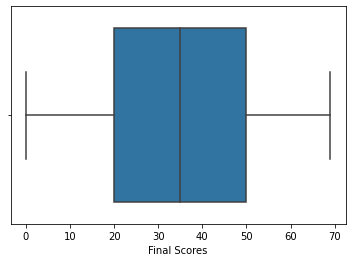

In [237]:
spread2 = sns.boxplot(x = df['Final Scores'])

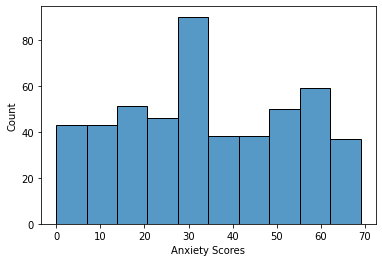

In [161]:
hist_anxiety = sns.histplot(data = df, x = 'Anxiety Scores')

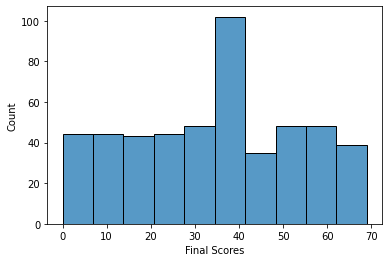

In [162]:
hist_final = sns.histplot(data = df, x = 'Final Scores')

In [ ]:
# As we can see the data is rather similary distributed for both Anxiety and Final scores

In [165]:
df_male = df[df['Gender']=='Male']
df_male

,Instructor,Anxiety Scores,Final Scores,Gender
1,D,60.0,43.0,Male
2,A,31.0,24.0,Male
3,C,32.0,16.0,Male
5,D,17.0,50.0,Male
8,C,57.0,9.0,Male
...,...,...,...,...
485,D,2.0,24.0,Male
486,A,22.0,30.0,Male
490,C,63.0,25.0,Male
492,D,34.0,46.0,Male


In [167]:
df_female = df[df['Gender']=='Female']
df_female

,Instructor,Anxiety Scores,Final Scores,Gender
0,C,62.0,16.0,Female
4,C,66.0,12.0,Female
6,A,24.0,24.0,Female
7,A,53.0,67.0,Female
9,B,66.0,66.0,Female
...,...,...,...,...
487,A,17.0,11.0,Female
488,B,37.0,14.0,Female
489,A,14.0,58.0,Female
491,C,27.0,25.0,Female


In [ ]:
# Now lets try and obseve the spread of anxiety and final scores on the basis of gender



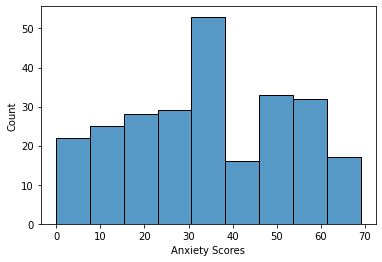

In [168]:
hist_anxiety_male = sns.histplot(data = df_male, x = 'Anxiety Scores')

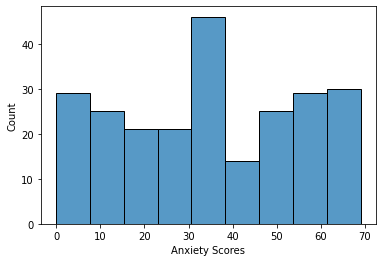

In [169]:
hist_anxiety_female = sns.histplot(data = df_female, x = 'Anxiety Scores')

In [ ]:
# the anxiety scores for both male and female are eerily simiar

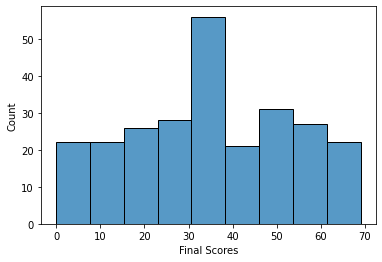

In [171]:
hist_final_male = sns.histplot(data = df_male, x = 'Final Scores')

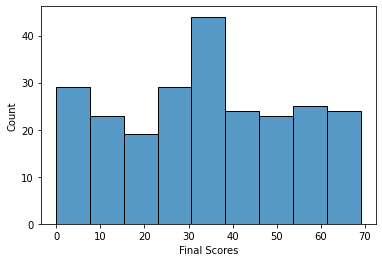

In [172]:
hist_final_female = sns.histplot(data = df_female, x = 'Final Scores')

In [ ]:
# The final scores are again similar for both males and females

In [ ]:
# Now lets try and understand the Instructor wise anxiety and final scores

<AxesSubplot:xlabel='Instructor', ylabel='Anxiety Scores'>

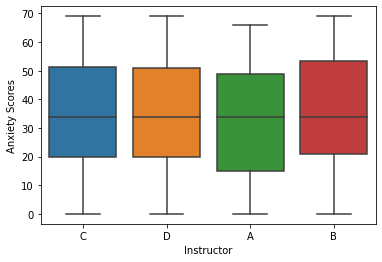

In [176]:
sns.boxplot(x = df['Instructor'],y = df['Anxiety Scores'])

In [ ]:
# From the above we can observe that for Instrutor C & D , the anxiety levels 
# are completely identical.
# A has the lowest min and max values for anxiety and B has theh maximum 
# Also there seems to be very little skewness for each instructor

In [178]:
# lets now try and split the data by pass and fail

df_pass = df[df['Final Scores']<50]
df_pass

,Instructor,Anxiety Scores,Final Scores,Gender
0,C,62.0,16.0,Female
1,D,60.0,43.0,Male
2,A,31.0,24.0,Male
3,C,32.0,16.0,Male
4,C,66.0,12.0,Female
...,...,...,...,...
490,C,63.0,25.0,Male
491,C,27.0,25.0,Female
492,D,34.0,46.0,Male
493,A,38.0,31.0,Male


In [179]:
df_pass = df[df['Final Scores']>=50]
df_pass

,Instructor,Anxiety Scores,Final Scores,Gender
5,D,17.0,50.0,Male
7,A,53.0,67.0,Female
9,B,66.0,66.0,Female
18,D,16.0,51.0,Male
20,B,8.0,63.0,Male
...,...,...,...,...
470,C,35.0,60.0,Female
473,D,51.0,56.0,Male
476,B,13.0,61.0,Female
483,A,55.0,69.0,Female


In [191]:
# From the above its clear that the more students have failed that passed
# Conversely we can also add pass fail in the dataframe itself so that we can getter better analysis

x = [ 'Pass' if rows>=50 else 'Fail' for rows in df['Final Scores'] ]

df['Pass/Fail'] = x
df.head(22)

# This is just to confirm that the new column is properly added

,Instructor,Anxiety Scores,Final Scores,Gender,Pass/Fail
0,C,62.0,16.0,Female,Fail
1,D,60.0,43.0,Male,Fail
2,A,31.0,24.0,Male,Fail
3,C,32.0,16.0,Male,Fail
4,C,66.0,12.0,Female,Fail
5,D,17.0,50.0,Male,Pass
6,A,24.0,24.0,Female,Fail
7,A,53.0,67.0,Female,Pass
8,C,57.0,9.0,Male,Fail
9,B,66.0,66.0,Female,Pass


<AxesSubplot:xlabel='Pass/Fail', ylabel='Count'>

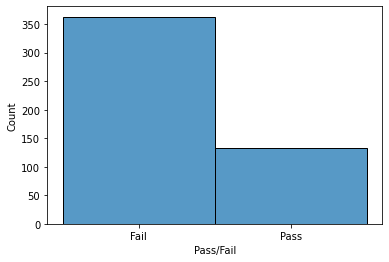

In [192]:
sns.histplot(x = df['Pass/Fail'])

# This shows that more studnts have failed than passed

<AxesSubplot:xlabel='Instructor', ylabel='count'>

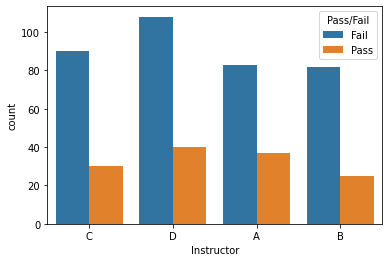

In [199]:
#Now lets see the distribution of the the pass fail wrt Instructor

sns.countplot(df['Instructor'], hue = df['Pass/Fail'])

# For all instructors more students have failed tahn passed

<AxesSubplot:xlabel='Pass/Fail', ylabel='Anxiety Scores'>

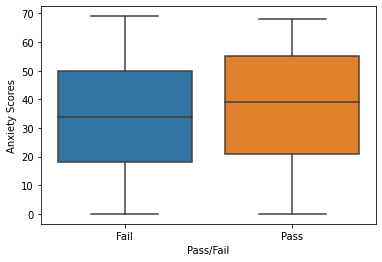

In [205]:
# Lets compare the Anxiety for the passed and failed students

sns.boxplot(data = df, y = 'Anxiety Scores', x = 'Pass/Fail')

# The min , max and the median scores of Anxiety for the pass students is more than that of Fail students

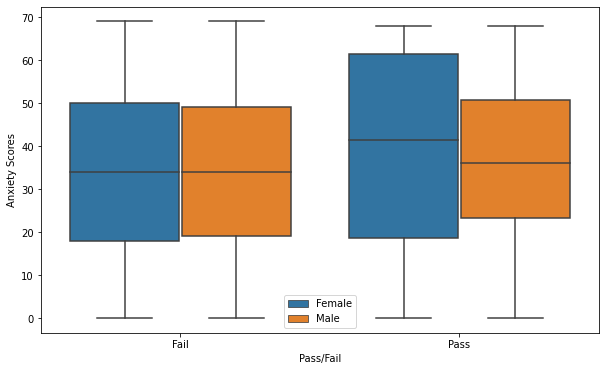

In [209]:
plt.figure(figsize =(10, 6))

ax = sns.boxplot(data = df, y = 'Anxiety Scores', x = 'Pass/Fail', hue = 'Gender')
ax.legend(loc = 'best')

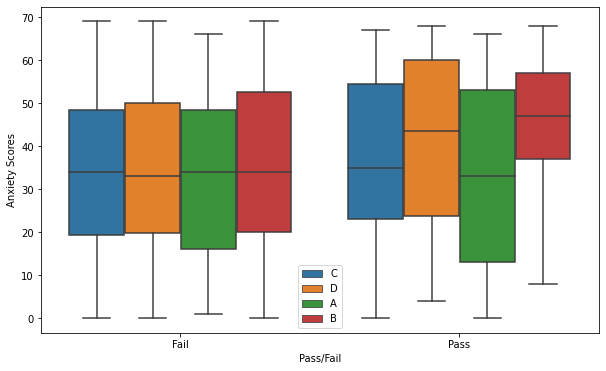

In [211]:
plt.figure(figsize =(10, 6))

ax = sns.boxplot(data = df, y = 'Anxiety Scores', x = 'Pass/Fail', hue = 'Instructor')
ax.legend(loc = 'best')